In [2]:
# load and normalize CIFAR10 training and test dataset using torchvision 
# define Convolutional NN 
# define loss function 
# train network on training data 
# test network on test data
import torch 
import torchvision 
import torchvision.transforms as transforms 


In [4]:
transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
        )
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,
                                       download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,
                                         shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data',train=False,
                                      download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=4,
                                        shuffle=False,num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


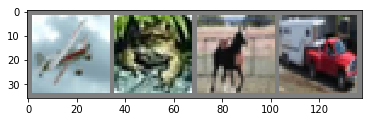

plane  frog horse truck


In [7]:
# show image 
import matplotlib.pyplot as plt 
import numpy as np 

def imshow(img): 
    img = img / 2 + 0.5 # unnormalize 
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
    
dataiter = iter(trainloader)
images,labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [72]:
import torch.nn as nn 
import torch.nn.functional as F 

class Net(nn.Module): 
    def __init__(self): 
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,1000,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(1000,16,5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self,x): 
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [73]:
# LOSS FUNCTION 
import torch.optim as optim 
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [60]:
for epoch in range(2): # loop over the dataset twice 
    running_loss = 0 
    for i, data in enumerate(trainloader,0): 
        inputs,labels = data
        optimizer.zero_grad() # zeroes parameters gradients 
        
        # forward + backward + optimizer 
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999: 
            print('[epoch: %d, batch %d] loss: %.3f' % (epoch+1, i+1,running_loss/2000))
            running_loss = 0.0
print('Finished training')

RuntimeError: shape '[-1, 400]' is invalid for input of size 64

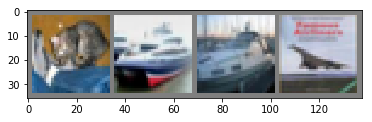

GroundTruth:    cat  ship  ship plane


In [43]:
dataiter = iter(testloader)
images,labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [37]:
outputs = net(images)
_, predicted = torch.max(outputs,1)
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

RuntimeError: size mismatch, m1: [65 x 400], m2: [6500 x 120] at /pytorch/aten/src/TH/generic/THTensorMath.cpp:940

In [19]:
correct = 0 
total = 0
with torch.no_grad(): 
    for data in testloader: 
        images, labels = data 
        outputs = net(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Accuracy of the network on the 10000 test images: %d %%' % 
         (100 * correct / total))
    

Accuracy of the network on the 10000 test images: 54 %


In [20]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad(): 
    for data in testloader: 
        images,labels = data 
        outputs = net(images)
        _,predicted = torch.max(outputs,1)
        c = (predicted == labels).squeeze()
        for i in range(4): 
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(10): 
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 60 %
Accuracy of   car : 81 %
Accuracy of  bird : 33 %
Accuracy of   cat : 24 %
Accuracy of  deer : 49 %
Accuracy of   dog : 69 %
Accuracy of  frog : 59 %
Accuracy of horse : 54 %
Accuracy of  ship : 64 %
Accuracy of truck : 52 %


In [74]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [75]:
net.to(device)
# redefining optimizer again after moving model to GPU works ...
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# optimizer = optimizer.cuda()

In [76]:
for epoch in range(2): # loop over the dataset twice 
    running_loss = 0 
    for i, data in enumerate(trainloader,0): 
        inputs,labels = data
        inputs,labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad() # zeroes parameters gradients 
        
        # forward + backward + optimizer 
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999: 
            print('[epoch: %d, batch %d] loss: %.3f' % (epoch+1, i+1,running_loss/2000))
            running_loss = 0.0
print('Finished training')

[epoch: 1, batch 2000] loss: 1.929
[epoch: 1, batch 4000] loss: 1.654
[epoch: 1, batch 6000] loss: 1.529
[epoch: 1, batch 8000] loss: 1.467
[epoch: 1, batch 10000] loss: 1.434
[epoch: 1, batch 12000] loss: 1.357
[epoch: 2, batch 2000] loss: 1.295
[epoch: 2, batch 4000] loss: 1.270
[epoch: 2, batch 6000] loss: 1.247
[epoch: 2, batch 8000] loss: 1.196
[epoch: 2, batch 10000] loss: 1.203
[epoch: 2, batch 12000] loss: 1.173
Finished training
